# X-ray mirror reflectivity
Explores the dependence of reflectivity of a metal foil to X-rays on the incidence angle, surface roughness, and X-ray energy.
- author: richard.t.jones at uconn.edu
- version: january 12, 2023

**References:**
1. X-ray data booklet, https://xdb.lbl.gov, Section 4.2   Specular Reflectivities for Grazing-Incidence Mirrors
1. X-ray optical constants lookup tool, https://henke.lbl.gov/optical_constants/getdb2.html
1. B. L. Henke, E. M. Gullikson, and J. C. Davis, “X-Ray Interactions: Photoabsorption, Scattering, Transmission, and Reflection at E = 50–30,000 eV, Z = 1–92,” At. Data  Nucl. Data Tables 54, 181 (1993)


In [4]:
# Al Density=2.7
# Energy(keV), Delta, Beta
Al_index_table = [
  [10.000,  5.46659703E-06,  6.59753994E-08],
  [11.161,  4.38041161E-06,  4.27215028E-08],
  [12.457,  3.51075823E-06,  2.76400591E-08],
  [13.903,  2.81429266E-06,  1.78730346E-08],
  [15.518,  2.25638223E-06,  1.15539391E-08],
  [17.320,  1.80937525E-06,  7.46883266E-09],
  [19.331,  1.45112415E-06,  4.83223683E-09],
  [21.576,  1.16395279E-06,  3.13181836E-09],
  [24.080,  9.33713807E-07,  2.04116124E-09],
  [26.878,  7.49100366E-07,  1.34106592E-09],
  [30.000,  6.01027239E-07,  8.9103086E-10],
]

#Au Density=19.32
# Energy(keV), Delta, Beta
Au_index_table = [
  [10.000,  2.99120929E-05,  2.2081831E-06],
  [11.161,  2.33886458E-05,  1.48579875E-06],
  [12.457,  1.86153211E-05,  2.48332594E-06],
  [13.903,  1.50161295E-05,  2.30320347E-06],
  [15.518,  1.27498379E-05,  1.79554138E-06],
  [17.320,  1.04635683E-05,  1.21823246E-06],
  [19.331,  8.49221306E-06,  8.22014954E-07],
  [21.576,  6.85592431E-06,  5.52256552E-07],
  [24.082,  5.51803669E-06,  3.69763171E-07],
  [26.878,  4.43287036E-06,  2.46932387E-07],
  [30.000,  3.55550856E-06,  1.64591839E-07],
]

def extrapolate_the_table(table, Emax_keV=100, Estep_keV=1):
    (k0, delta0, beta0) = table[-1]
    (k1, delta1, beta1) = table[-2]
    for k in np.arange(table[-1][0] + Estep_keV, Emax_keV, Estep_keV):
        delta = delta0 * (delta1 / delta0) ** (np.log(k / k0) / np.log(k1 / k0))
        beta = beta0 * (beta1 / beta0) ** (np.log(k / k0) / np.log(k1 / k0))
        table.append([k, delta, beta])

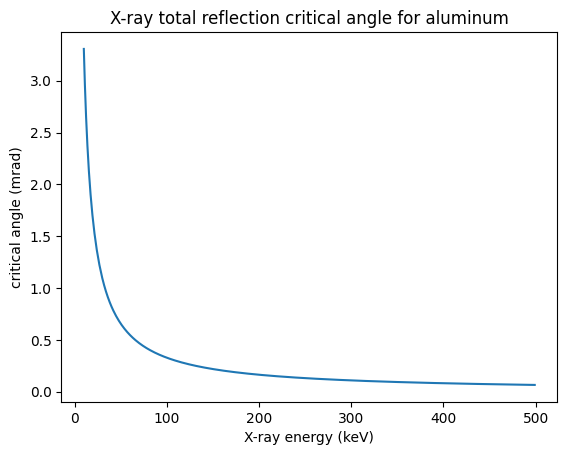

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# delta gives real part of refractive index (from https://henke.lbl.gov/optical_constants/getdb2.html)
extrapolate_the_table(Al_index_table, Emax_keV=500)
delta = Al_index_table[0][1]
energies = np.array([row[0] for row in Al_index_table], dtype=float)
deltas = np.array([row[1] for row in Al_index_table], dtype=float)
betas = np.array([row[2] for row in Al_index_table], dtype=float)
critical_angles = np.arccos(1 - deltas) * 1e3 # mrad

fig, ax = plt.subplots()
ax.plot(energies, critical_angles)

ax.set(xlabel='X-ray energy (keV)', ylabel='critical angle (mrad)',
       title='X-ray total reflection critical angle for aluminum')

fig.savefig("critical_angle_Al.png")
plt.show()

foil thickness is 0.0449438202247191 radiation lengths


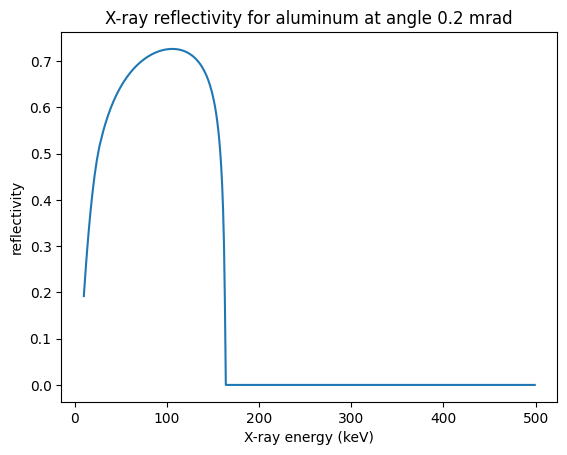

In [6]:
# mirror angle and surface roughness of mirror
refl_angle = 0.2 # mrad
foil_thick = 800 # nm
roughness = 200 # nm
hbarc = 0.197 # keV.nm
foil_radlen = 8.9e7 # nm

# how many radiation lengths is this foil?
print(f"foil thickness is {foil_thick / (refl_angle * 1e-3) / foil_radlen} radiation lengths")

# The formulas for parallel and perpendicular polarization
# are very close to equal at grazing incidence, do not distinguish.
kiz = np.sin(refl_angle * 1e-3)
ktz = ((1 - deltas - betas*1j)**2 - np.cos(refl_angle * 1e-3)**2)**0.5
ramp = (kiz - ktz) / (kiz + ktz)
reflectivities = abs(ramp)**2
roughness_factors = np.exp(-4 * kiz * ktz.real * (energies * roughness/hbarc)**2)

fig, ax = plt.subplots()
ax.plot(energies, reflectivities * roughness_factors)
ax.set(xlabel='X-ray energy (keV)', ylabel='reflectivity',
       title=f'X-ray reflectivity for aluminum at angle {refl_angle} mrad')

fig.savefig("reflectivity_Al.png")
plt.show()